**Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

# Operación Convolución

##  Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Oleg Jarma, ojarmam@unal.edu.co
4. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## Referencias
1. Ian Goodfellow, Yosua Bengio and Aaron Courville, Deep Learning, MIT press, 2016.
2. Vincent Doumolin and Francesco Visin, A guide to convolution arithmetic for deep learning, ArXiv:1603.07285v2, 2018
3. [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)
4. [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

## Contenido

* [Introducción](#Introducción)
* [¿Qué es una Convolución?](#¿Qué-es-una-Convolución?)
    * [Uso en Procesamiento de Imágenes](#Uso-en-Procesamiento-de-Imágenes)
    * [Ejemplos Reales](#Ejemplos-Reales)
* [Relleno (Padding)](#Relleno-(Padding))
* [Saltos (Strides)](#Saltos-(Strides))
* [Convoluciones en RGB](#Convoluciones-en-RGB)
* [Parameter Sharing](#Parameter-Sharing)
* [Agrupamiento (Pooling)](#Agrupamiento-(Pooling))



## Introducción 

Las redes RNC son un tipo especializado de red neuronal para procesar datos que tiene una topología conocida similar a una cuadrícula. 

Los ejemplos incluyen datos de series temporales, que pueden puede considerarse como una cuadrícula 1D que toma muestras a intervalos de tiempo regulares y datos de imagen, que puede considerarse como una cuadrícula de píxeles en 2D.

El nombre "red neuronal convolucional" indica que la red emplea una operación matemática llamada convolución. 

La convolución es un tipo especializado de operación lineal. 

Las redes convolucionales son simplemente redes neuronales que utilizan convolución en lugar de una matriz general en al menos una de sus capas.

**Ejemplos:**

![cnn1](https://miro.medium.com/max/700/1*4ZCDvUzyGJdMCzYvCDiJXA.png)

Fuente: [Deep Learning for Time Series Classification: a brief overview](https://medium.com/@hassanismailfawaz/deep-learning-for-time-series-classification-a-brief-overview-73b58767ed0f)

![cnn2](https://miro.medium.com/max/576/1*fpcruf9wnrE04N61ghLS3g.png)

Fuente: [Efficient method for running Fully Convolutional Networks (FCNs)](https://towardsdatascience.com/efficient-method-for-running-fully-convolutional-networks-fcns-3174dc6a692b)

[[Volver al Inicio]](#Contenido)

## ¿Qué es una Convolución? 

Supongamos que estamos rastreando la ubicación de una nave espacial con un sensor láser. 

Nuestro sensor láser proporciona una salida única $ x (t) $, la posición de la nave espacial en el momento $ t $.

Tanto $ x $ como $ t $ tienen un valor real, es decir, podemos obtener una lectura diferente del láser sensor en cualquier instante en el tiempo.

Ahora suponga que nuestro sensor láser es algo ruidoso.

Para obtener una estimación menos ruidosa de la posición de la nave espacial, una buena idea es promediar varias mediciones.

Por supuesto, las mediciones más recientes son más relevantes, por lo que lo haremos un promedio ponderado que otorgue más peso a las mediciones recientes.

Podemos hacer esto con una función de ponderación $ w (a) $, donde $ a $ es la edad de una medición.

Si aplicamos una operación promedio ponderada en cada momento, obtenemos una nueva función que proporciona una estimación suavizada de la posición $s$ de la nave espacial:

$$
s(t) = \int x(a) w(t-a)da
$$

Observe que si $a_1.\ldots, a_n$ es una muestra de la distibución cuya función de densidad es $w$, entonces se tiene que

$$
s(t)\approx \tfrac{1}{n}\sum_{i=1}^n x(a_i) w(t-a_i)
$$
Esta operación se llama convolución. La operación de convolución es típicamente denotado con un asterisco:

$$
s(t) = (x ∗ w)(t)
$$
En el ejemplo, $ w $ debe ser una función de densidad de probabilidad válida, o el el resultado no es un promedio ponderado.

Veamos un pequeño ejemplo en acción:

![conv3](https://joseph-long.com/writing/AstroPy-boxcar/2014-03-27-AstroPy-boxcar/AstroPy_boxcar_10_1.png)

Fuente: [Boxcar smoothing with AstroPy](https://joseph-long.com/writing/AstroPy-boxcar/)

Sin embargo, podemos hacer convoluciones con funciones más generales.

La fórmula matemática de la convolución de dos funciones es

$$
(f * g)(t)=\int_{-\infty}^{\infty}f(\tau)g(t-\tau)d\tau
$$

Y se puede usar para, por ejemplo, suavizar bordes de diferentes señales, como vemos a continuación:

![conv2](https://qph.fs.quoracdn.net/main-qimg-58b5ef2bc0b48afeea246bf0058bf1bb)

Fuente: [What is the phyical significance of convolution?](https://www.quora.com/What-is-the-physical-significance-of-convolution)

![Conv1](https://www.ncbi.nlm.nih.gov/books/NBK546153/bin/ch2f3.jpg)

Fuente:[Medical Imaging Systems: An Introductory Guide](https://www.ncbi.nlm.nih.gov/books/NBK546153/)

A pesar de esto, mantendremos nuestra notación anterior para indicar lo siguiente:

**Terminología:**
1. $x$ es la entrada input.
2. $w$ es el kernel de la convolución.
3. $s$, la salida, es el feature map.

Por otro ladp, es claro que en la vida real no contamos con almacenamiento de información continua, por lo que el concepto de convolución debe usarse de manera discreta (o por medio de muestreos continuos de la señal que está siendo medida):

$$
s(t) = (x ∗ w)(t) = \sum_{a=-\infty}^{\infty} x(a)w(t-a)
$$

[[Volver al Inicio]](#Contenido)

## Uso en Procesamiento de Imágenes 

Las convoluciones son muy útiles en la ciencia y la ingeniería y se pueden consultar [aqui](https://en.wikipedia.org/wiki/Convolution#Applications) algunas de ellas.

En las próximas sesiones, nos enfocaremos en su uso para crear redes neuronales convolucionales tanto en clasificaicón como en predicción.

Tal vez, una de las aplicaciones más usadas en el **Aprendizaje de Máquina**, es su uso sobre imágenes.

**Sí, es posible extender el concepto de convolución a objetos en dos o más dimensiones, como es el caso de una fotografía a color.**

**Sumas Finitas:**

Si pensaramos en el mismo proceso anterior pero en 2D, podríamos obtener una fórmula como la siguiente:

$$
S (i, j) = (I ∗ K) (i, j) = \sum_ {m} \sum_ {n} I (m, n) K (i-m, j-n).
$$

Donde **I denota la Imagen en cada pixel $m,n$** y **$K$ representa el Kernel trasladándose a lo largo y ancho de la imagen $I$**.

**Conmutatividad:**

La convolución es conmutativa. Podemos escribir

$$
S (i, j) = (K ∗ I) (i, j) = \sum_ {m} \sum_ {n} I (i-m, j-n) K (m, n).
$$

Esta propiedad es conveniente para el estudio matemático de convoluciones.

**Correlación Cruzada:**

Por otro lado, muchas bibliotecas de redes neuronales implementan un función relacionada llamada correlación cruzada, que es lo mismo que convolución pero sin voltear el kernel:


$$
S (i, j) = (I ∗ K) (i, j) = \sum_m \sum_n I (i + m, j + n) K (m, n).
$$


Muchas bibliotecas de aprendizaje automático implementan correlación cruzada pero la llaman convolución. Haremos lo mismo.

**Ejemplo:**

Recordemos que una imagen es un tensor y e algunas ocasiones se puede visualizar por completo:

![nine](https://miro.medium.com/max/576/1*HPbsBA5BJovt-vrbF1C7Jg.png)

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

De la fórmula a la práctica, la convolución de un kernel específico se vería así:

![conv_img](https://miro.medium.com/max/576/1*32zCSTBi3giSApz1oQV-zA.gif)

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

[[Volver al Inicio]](#Contenido)

## Ejemplos Reales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

astronauta=Image.open("../Imagenes/castle.jpeg")
astronauta_gris=astronauta.convert('L')

data_astronauta=np.array(astronauta_gris)

scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]])


kernel=np.array([[1,2,1],
                [0,0,0],
                [-1,-2,-1]])

kernel2=np.array([[1,0,-1],
                  [1,0,-1],
                  [1,0,-1]])

c1 = convolve2d(data_astronauta, scharr, boundary='symm', mode='same')
c2 = convolve2d(data_astronauta, kernel, boundary='symm', mode='same')
c3 = convolve2d(data_astronauta, kernel2, boundary='symm', mode='same')

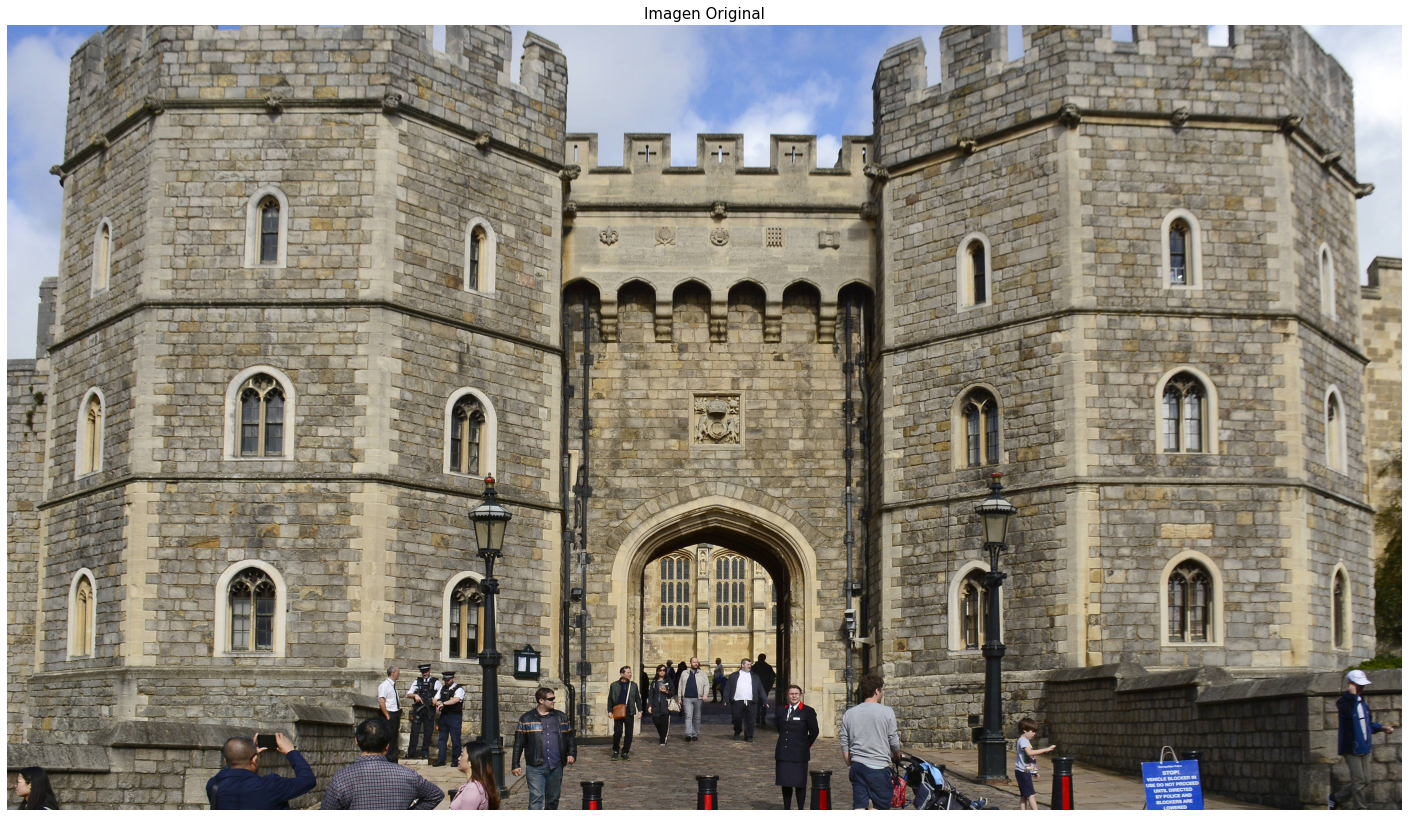

In [2]:
plt.figure(figsize=(25,15))
plt.title('Imagen Original',fontsize=15)
plt.imshow(astronauta,cmap='gray')
plt.axis('off')
plt.show()

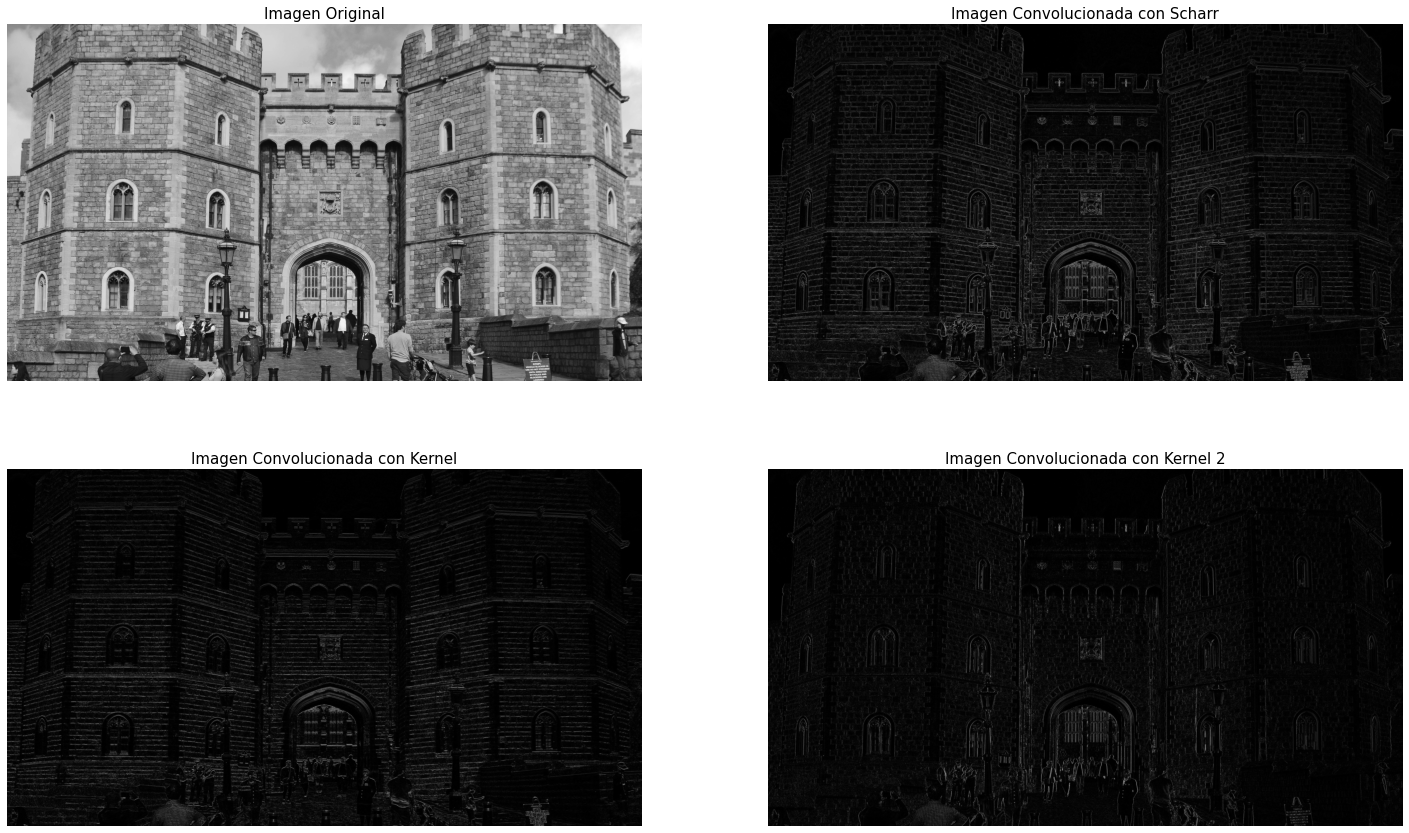

In [3]:
plt.figure(figsize=(25,15))

#plt.suptitle('Ejemplo de Convolución',fontsize=15)

plt.subplot(221)
plt.title('Imagen Original',fontsize=15)
plt.imshow(astronauta_gris,cmap='gray')
plt.axis('off')

plt.subplot(222)
plt.title('Imagen Convolucionada con Scharr',fontsize=15)
plt.imshow(np.absolute(c1), cmap='gray')
plt.axis('off')

plt.subplot(223)
plt.title('Imagen Convolucionada con Kernel',fontsize=15)
plt.imshow(np.absolute(c2), cmap='gray')
plt.axis('off')

plt.subplot(224)
plt.title('Imagen Convolucionada con Kernel 2',fontsize=15)
plt.imshow(np.absolute(c3), cmap='gray')
plt.axis('off')

plt.show()

[[Volver al Inicio]](#Contenido)

## Relleno (Padding)

Al hacer nuestro proceso de convolución, se generan cierta **pérdida de información** debida a las esquinas de la imagen.

De hecho, la imagen convolucionada sufre un cambio de dimensión a la baja.

Por lo tanto, la posición de un pixel en la imagen juega un papel fundamental, como se ilustra a continuación:

![posconv](https://miro.medium.com/max/576/1*P1vkUXqHJbAbUQWDrxg8rA.gif)

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

Para arreglar dicho problema, podemos por ejemplo, agregar una **frontera extra de ceros** al borde la imagen.

Dicho proceso es conocido como relleno de ceros o **zero-padding**.

![zero-padding](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Ciencia-de-Datos/blob/f871b4cc0b925431fd772026561ab6550652a3f5/Cuadernos/Imagenes/Padding.png)

Fuente: [Redes Neuronales Convolucionadas (RNC)](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Ciencia-de-Datos/blob/f871b4cc0b925431fd772026561ab6550652a3f5/Cuadernos/Convolucion_Redes.ipynb)

En el lenguaje de convoluciones, usualmente se usan dos modos:

- **Valid:** Regresa la imagen con el kernel convolucionado sin cambios (reduce dimensión de salida).
- **Same:** Regresa la imagen con el mismo tamaño que la imagen original.

En el caso de hacer padding y usar **same**, el padding debe cumplir la siguiente ecuación:

$$p=\frac{f-1}{2}$$

donde $p$ es el padding y $f$ es la dimensión del kernel.

[[Volver al Inicio]](#Contenido)

## Saltos (Strides) 

En algunos casos, no queremos tantos detalles sobre la convolución (por ejemplo, si no hay tantos detalles de pixel en pixel).

En estos casos, es gratoq ue podemos tener en nuestras redes convolucionadas el parámetro de **salto ó stride**:

![stride](https://miro.medium.com/max/576/1*itcofCIVsGe7rBmciJcmVw.gif)

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

En este caso, la fórmula asociada a la dimensión de salida es:


$$n_{out}=\text{floor}\biggl({\frac{n_{in}+2p-f}{s}+1}\biggr)$$

[[Volver al Inicio]](#Contenido)

## Convoluciones en RGB 

**¿Qué hacemos cuando tenemos una imagen a color?**

Usamos el mismo concepto de convolución, pero en este caso usaremos un kernel para cada canal de color.

Esto nos ayuda también a poder aplicar varios kernel en una sola capa de la red.

**Recuerde que debe usar la misma dimensión tensorial de la imagen con el kernel aplicado.**

![conv-rgb](https://miro.medium.com/max/576/1*Ukb2msCjU3G5eS4a45f-lg.png)

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

En este caso, el resutlado final de la convolución a un solo kernel, se conoce como **filtro**.

Note que a pesar de ser una operación entre tensores de dimensión 3, el resultado es un tensor de dimensión 2.

La fórmula que explica las dimensiones de salida es:

$$[n,n,n_c]*[f,f,n_c]=\biggl[\text{floor}\biggl({\frac{n+2p-f}{s}+1}\biggr),\text{floor}\biggl({\frac{n+2p-f}{s}+1}\biggr),n_f\biggr]$$

Importante recordar que cada kernel usado resultará en un filtro diferente y disyunto:

![dif-filters](https://miro.medium.com/max/576/1*45GSvnTvpHV0oiRr78dBiw@2x.png)

Fuente: [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#7d8a)

## Parameter Sharing

Como se podrán haber dado cuenta, una red densamente conectada (DNN) no son la mejor opción al momento de trabajar con imágenes, dada la cantidad tan enorme de parámetros que deben ser aprendidos.

Para entender el verdadero poder de las convoluciones, note la siguente imagen:

![par-share](https://miro.medium.com/max/576/1*6S1ltWsTUIdULzRxqueWiA.gif)

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

Vemos claramente que **!no todas las neuronas están conectadas entre sí!**

Además, que algunas neuronas comparten los mismos pesos.

**Esto signfica que una red neuronal convolucionada tiene muchos menos parámetros para aprender.**




[[Volver al Inicio]](#Contenido)

## Agrupamiento (Pooling) 

Además de las capas convolucionadas, muchas veces es usada la operación llamada **pooling** para reducir el tamaño del tensor y vovler más rápido el procesamiento.

Además, esto reduce el número de parámetros y un número menor de parámetros evita el sobreajuste.

Estas capas son bastante sencillas. Una vez definidos los hiperparámetros de salto y tamaño de kernel, tenemos fundamentalmente dos tipos de pooling:

- **Max Pooling:** Divide la imagen en diferentes regiones y toma el valor máximo de dicha región.

![maxpool](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Ciencia-de-Datos/blob/f871b4cc0b925431fd772026561ab6550652a3f5/Cuadernos/Imagenes/maxpool.webp)

Fuente: [Redes Neuronales Convolucionadas (RNC)](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Ciencia-de-Datos/blob/f871b4cc0b925431fd772026561ab6550652a3f5/Cuadernos/Convolucion_Redes.ipynb)

![maxpool2](https://miro.medium.com/max/576/1*qImgD2KGZw7ETjw3mOxNyg.gif)

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

- **Average Pooling:** Divide la imagen en diferentes regiones y toma el valor promedio de dicha región.

![av-pool](https://embarc.org/embarc_mli/doc/build/html/_images/image109.png)

Fuente: [Average-Pooling](https://embarc.org/embarc_mli/doc/build/html/MLI_kernels/pooling_avg.html)

[[Volver al Inicio]](#Contenido)

**Recordemos que todo este proceso es para construir redes de esta manera:**

![cnn-arq](https://miro.medium.com/max/576/1*uUYc126RU4mnTWwckEbctw@2x.png)

Fuente: [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#7d8a)

**En efecto, una de las arquitecturas más famosas del estado del arte, conocida como VGG es:**

![vgg](https://miro.medium.com/max/576/1*U8uoGoZDs8nwzQE3tOhfkw@2x.png)

Fuente:[Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#7d8a)